In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
bta = Table.read_table(path_data + 'bta.csv')
bta.show()

In [3]:
bta.group('Group', sum)

Group     | Result sum
Control   | 2
Treatment | 9

In [4]:
bta.group('Group', np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

In [5]:
observed_outcomes = Table.read_table(path_data + "observed_outcomes.csv")
observed_outcomes.show()

In [6]:
bta.group('Group', np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

In [7]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [8]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [9]:
distance(bta, 'Group')

0.475

In [10]:
shuffled_labels = bta.sample(with_replacement=False).column(0)

In [11]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

In [12]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.08750000000000002

In [13]:
distance(bta_with_shuffled_labels, 'Group')

0.475

In [14]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [15]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

Observed Distance 0.475


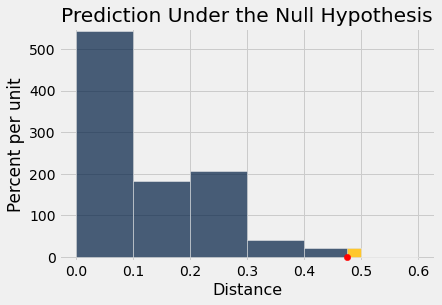

In [16]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 5.5)
plots.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

In [17]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.00875